<a href="https://colab.research.google.com/github/gusmaomarcos/alura/blob/main/redes_neurais_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving Bicicletas.csv to Bicicletas (1).csv


{'Bicicletas.csv': b'clima,temperatura,bicicletas_alugadas\n2,0.363625,985\n2,0.35373899999999997,801\n1,0.189405,1349\n1,0.21212199999999998,1562\n1,0.22926999999999997,1600\n1,0.23320900000000003,1606\n2,0.208839,1510\n2,0.162254,959\n1,0.116175,822\n1,0.15088800000000002,1321\n2,0.19146400000000002,1263\n1,0.160473,1162\n1,0.150883,1406\n1,0.188413,1421\n2,0.248112,1248\n1,0.234217,1204\n2,0.176771,1000\n2,0.23233299999999998,683\n2,0.29842199999999997,1650\n2,0.25505,1927\n1,0.157833,1543\n1,0.0790696,981\n1,0.09883910000000001,986\n1,0.11793,1416\n2,0.234526,1985\n3,0.2036,506\n1,0.2197,431\n2,0.22331700000000002,1167\n1,0.212126,1098\n1,0.250322,1096\n2,0.18625,1501\n2,0.23453000000000002,1360\n2,0.254417,1526\n1,0.177878,1550\n2,0.22858699999999998,1708\n2,0.243058,1005\n1,0.291671,1623\n1,0.303658,1712\n1,0.198246,1530\n2,0.144283,1605\n1,0.14954800000000001,1538\n1,0.213509,1746\n1,0.232954,1472\n1,0.324113,1589\n1,0.39835,1913\n1,0.254274,1815\n1,0.3162,2115\n1,0.428658,2475\

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('Bicicletas.csv')

In [ ]:
dados.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [ ]:
dados.shape

(731, 3)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'temperatura')

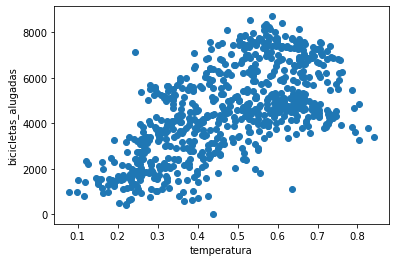

In [ ]:
plt.scatter(dados['temperatura'], dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')

Text(0.5, 0, 'clima')

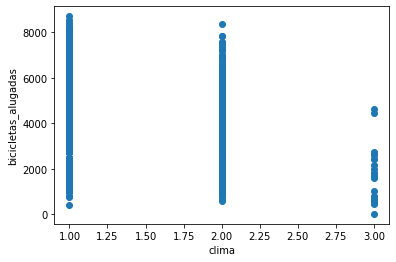

In [ ]:
plt.scatter(dados['clima'], dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')

In [ ]:
import numpy as np

In [ ]:
y = dados['bicicletas_alugadas'].values

In [ ]:
x = dados[['clima', 'temperatura']].values
print(x)

[[2.       0.363625]
 [2.       0.353739]
 [1.       0.189405]
 ...
 [2.       0.2424  ]
 [1.       0.2317  ]
 [2.       0.223487]]


In [ ]:
x = x/np.amax(x, axis=0)
print(x)

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 ...
 [0.66666667 0.28826395]
 [0.33333333 0.27553942]
 [0.66666667 0.26577246]]


In [ ]:
y = y/np.amax(y)
print(y)

[0.11303649 0.09192105 0.15480835 0.17925178 0.18361258 0.18430112
 0.17328437 0.11005279 0.09433096 0.15159513 0.14493918 0.13334863
 0.16134955 0.16307092 0.14321781 0.13816846 0.11475786 0.07837962
 0.18935047 0.2211384  0.17707138 0.11257746 0.11315125 0.16249713
 0.22779435 0.05806748 0.04946064 0.13392242 0.12600413 0.12577462
 0.17225155 0.15607069 0.1751205  0.17787468 0.19600643 0.11533165
 0.18625201 0.19646546 0.17557953 0.18418637 0.17649759 0.20036723
 0.16892357 0.18235024 0.21953179 0.20828552 0.24271288 0.28402571
 0.33589626 0.1876291  0.20794124 0.12703695 0.1663989  0.21999082
 0.20736745 0.16766123 0.22595823 0.27564838 0.16593987 0.2124168
 0.24489328 0.193367   0.22308928 0.23835208 0.06942851 0.21482672
 0.24477852 0.21700711 0.07149415 0.22687629 0.24466376 0.27736975
 0.23479458 0.23594216 0.25154923 0.31489557 0.37170071 0.35770025
 0.28356667 0.23835208 0.3101905  0.24340142 0.21402341 0.25361487
 0.28643562 0.19428506 0.23272894 0.27828781 0.17626807 0.19336

In [ ]:
def sigmoid(soma):
  return 1/(1+np.exp(-soma))

In [ ]:
def relu(soma):
  return np.maximum(0, soma)

In [ ]:
arquitetura = [
               {'dim_entrada':2, 'dim_saida':3, 'ativacao':'relu'},
               {'dim_entrada':3, 'dim_saida':1, 'ativacao':'sigmoid'}
               ]

In [ ]:
def inicia_camadas(arquitetura, seed = 99):
  np.random.seed(seed)

  numero_de_camadas = len(arquitetura)

  valores_parametros = {}

  for indice, camada in enumerate(arquitetura):
    indice_camada = indice+1

    tamanho_camada_entrada = camada['dim_entrada']
    tamanho_camada_saida = camada['dim_saida']

    valores_parametros['P' + str(indice_camada)] = np.random.randn(tamanho_camada_saida, tamanho_camada_entrada)
    valores_parametros['b' + str(indice_camada)] = np.random.randn(tamanho_camada_saida, 1) * 0.1

  return valores_parametros


In [ ]:
def propaga_uma_camada(ativado_anterior, pesos_atual, b_atual, ativacao='relu'):
  saida_atual = np.dot(pesos_atual, ativado_anterior) + b_atual

  if ativacao == 'relu':
    func_ativacao = relu
  elif ativacao == 'sigmoid':
    func_ativacao = sigmoid

  return func_ativacao(saida_atual), saida_atual

In [ ]:
def propaga_total(x, valores_parametros, arquitetura):
  memoria = {}

  ativado_atual = x

  for indice, camada in enumerate(arquitetura):

    indice_camada = indice+1
    ativado_anterior = ativado_atual

    func_ativacao_atual = camada['ativacao']

    pesos_atual = valores_parametros['P' +str(indice_camada)]
    b_atual = valores_parametros['b' +str(indice_camada)]

    ativado_atual, saida_atual = propaga_uma_camada(ativado_anterior, pesos_atual, b_atual, func_ativacao_atual)

    memoria['A'+str(indice)] = ativado_anterior
    memoria['z'+str(indice_camada)] = saida_atual

  return ativado_atual, memoria